In [35]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
import random
import sys


# основная функция, производящая расчеты
def nash_equilibrium(a, ret = False, show = True):
	matrix_min = find_matrix_min(a)
	a += matrix_min	
	a_minus = -1 * a
	res1 = linprog(np.ones(len(a)), a_minus.transpose(), np.linspace(-1, -1, len(a[0])))
	value = 1/res1.fun 
	strat1 = value * np.array(res1.x) 
	res2 = linprog(np.linspace(-1, -1, len(a[0])), a, np.ones(len(a)))
	strat2 = value * np.array(res2.x)
	value -= matrix_min	
	res = np.array([strat1, strat2, value])
	if show:
		print("value = ", res[2])
		print("p = ", res[0])
		print("q = ", res[1])
		print_graph(res[0], res[1])
	if ret:	
		return res

# функция находит число, которое нужно прибавить к матрице 
def find_matrix_min(a):
	min_val = a.min()
	if min_val > 0:
		return 0
	return abs(min_val) + 1


# функция выводит на экран спектры оптимальных стратегий игроков, и сохраняет их в формате png 
def print_graph(strat1,strat2):
	x = np.arange(1, len(strat1) + 1, 1)
	plt.figure(1)
	plt.title("Strategy of the first player")
	plt.grid(linestyle='solid')	
	plt.plot(x, strat1, 'go')
	plt.show()

	x = np.arange(1, len(strat2) + 1, 1)
	plt.figure(2)
	plt.title("Strategy of the second player")
	plt.grid(linestyle='solid')	
	plt.plot(x, strat2, 'bo')
	plt.show()

# генерация рандомной матрицы
def random_matrix():
	s = random.randint(1,20)
	c = random.randint(1,20)
	matrix = np.empty((s, c))
	for i in range(s):
		for j in range(c):
			matrix[i][j] = random.randint(-100, 100)
			print(matrix[i][j], " ",  end="")
		print('\n')
	return matrix

# чтение матрицы из файла
def matrix_from_file(name):
	with open(name, 'r') as ifile:
		size_line = len((ifile.readline()).split())
	matrix = np.loadtxt(name, usecols=range(size_line))
	return matrix	



Игра из примера:

value =  4.87096774194
p =  [ 0.          0.12903226  0.09677419  0.43548387  0.33870968  0.        ]
q =  [ 0.          0.          0.69086022  0.14516129  0.14784946  0.01612903]


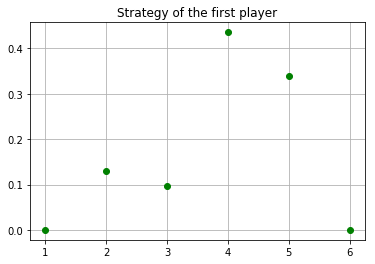

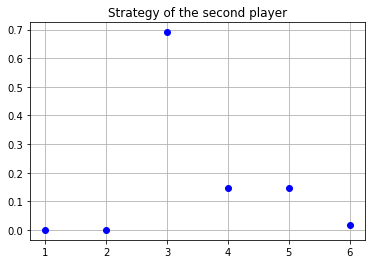

In [36]:
A = np.array([[4, 0, 6, 2, 2, 1],
               [3, 8, 4, 10, 4, 4],
               [1, 2, 6, 5, 0, 0],
               [6, 6, 4, 4, 10, 3],
               [10, 4, 6, 4, 0, 9],
               [10, 7, 0, 7, 9, 8]])

nash_equilibrium(A)

Cпектр оптимальной стратегии состоит из одной точки:

value =  1.0
p =  [ 1.  0.  0.  0.]
q =  [ 0.  0.  1.  0.]


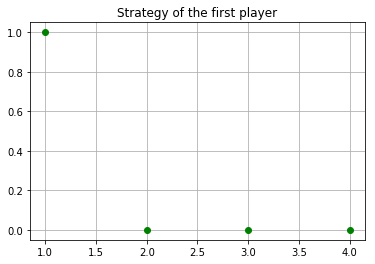

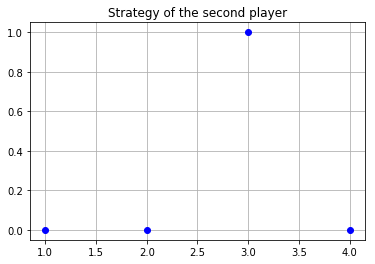

In [37]:
A = np.array([[7, 6, 1, 5],
              [4, 0 ,0, 2],
              [9, 1, -6, 1],
              [3, 1, -1, 1]])
nash_equilibrium(A)

Cпектр оптимальной стратегии неполон:

value =  2.5
p =  [ 0.5  0.5  0. ]
q =  [ 0.5  0.5  0. ]


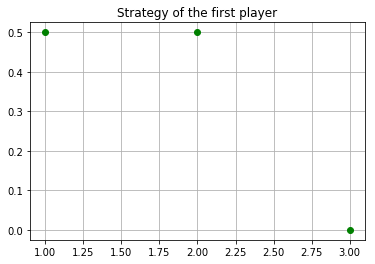

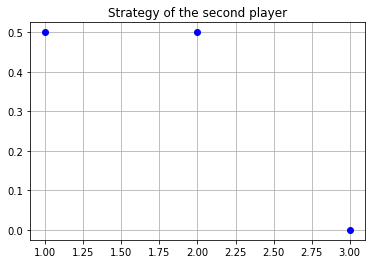

In [38]:
A = np.array([[1, 4, 3],
              [4, 1, 2],
              [3, 2, 1]])
nash_equilibrium(A)

Cпектр оптимальной стратегии полон:

value =  0.2
p =  [ 0.4  0.6]
q =  [ 0.4  0.6]


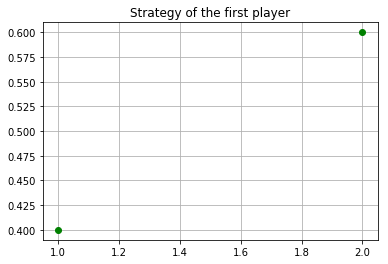

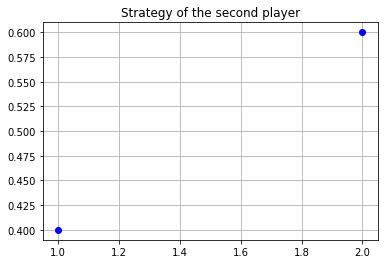

In [39]:
A = np.array([[2, -1],
              [-1, 1]])
nash_equilibrium(A)


Unit-тесты

In [53]:
import unittest
from unittest import *
import numpy as np

class TestFunc(unittest.TestCase):
	def setUp(self):
		pass
	def tearDown(self):
		pass
	
#тест из примера
	def test_number_1(self):

		a = np.array([[4, 0, 6, 2, 2, 1],
					 [3, 8, 4, 10, 4, 4],
					 [1, 2, 6, 5, 0, 0],
					 [6, 6, 4, 4, 10, 3],
					 [10, 4, 6, 4, 0, 9],
					 [10, 7, 0, 7, 9, 8]])
		res1 = np.array([[0, 0.12903226, 0.09677419, 0.43548387, 0.33870968, 0],
		                [0, 0, 0.69086022, 0.14516129, 0.14784946, 0.01612903],
			             4.87096774194])
		res2 = nash_equilibrium(a, False, False)
		
		self.assertAlmostEqual(res1[2], res2[2], 4)
		for i in range(len(res1[0])): 		
			self.assertAlmostEqual(res1[0][i], res2[0][i], 4)
		for i in range(len(res1[1])):			
			self.assertAlmostEqual(res1[1][i], res2[1][i], 4)

#тест для случая, когда спектр оптимальной стратегии состоит из одной точки		
	def test_number_2(self):
		a = np.array([[7, 6, 1, 5],
					 [4, 0, 0, 2],
					 [9, 1, -6, 1],
					 [3, 1, -1, 1]])
		res1 = np.array([[1, 0, 0, 0], [0, 0, 1, 0], 1])
		res2 = nash_equilibrium(a, False, False)
		
		self.assertAlmostEqual(res1[2], res2[2], 4)		
		for i in range(len(res1[0])): 		
			self.assertAlmostEqual(res1[0][i], res2[0][i], 4)
		for i in range(len(res1[1])):			
			self.assertAlmostEqual(res1[1][i], res2[1][i], 4)

#тест для случая, когда спектр оптимальной стратегии неполон	
	def test_number_3(self):
		a  = np.array([[1, 4, 3],
					  [4, 1, 2],
					  [3, 2, 1]])
		res1 = np.array([[0.5, 0.5, 0],
						 [0.5, 0.5, 0],
						  2.5])
		res2 = nash_equilibrium(a, False, False)

		self.assertAlmostEqual(res1[2], res2[2], 4)		
		for i in range(len(res1[0])): 		
			self.assertAlmostEqual(res1[0][i], res2[0][i], 4)
		for i in range(len(res1[1])):			
			self.assertAlmostEqual(res1[1][i], res2[1][i], 4)

#тест для случая, когда спектр оптимальной стратегии полон
	def test_number_4(self):
		a = np.array([[2, -1],
					 [-1, 1]])
		res1 = np.array([[0.4, 0.6], [0.4, 0.6], 0.2])
		res2 = nash_equilibrium(a, False, False)

		#self.assertAlmostEqual(res1[2], res2[2], 4)
		for i in range(len(res1[0])): 		
			self.assertAlmostEqual(res1[0][i], res2[0][i], 4)
		for i in range(len(res1[1])):			
			self.assertAlmostEqual(res1[1][i], res2[1][i], 4)


suite = unittest.TestLoader().loadTestsFromTestCase(TestFunc)
unittest.TextTestRunner().run(suite)

EEEE
ERROR: test_number_1 (__main__.TestFunc)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-53-4e53b34d4110>", line 25, in test_number_1
    self.assertAlmostEqual(res1[2], res2[2], 4)
TypeError: 'NoneType' object is not subscriptable

ERROR: test_number_2 (__main__.TestFunc)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-53-4e53b34d4110>", line 40, in test_number_2
    self.assertAlmostEqual(res1[2], res2[2], 4)
TypeError: 'NoneType' object is not subscriptable

ERROR: test_number_3 (__main__.TestFunc)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-53-4e53b34d4110>", line 56, in test_number_3
    self.assertAlmostEqual(res1[2], res2[2], 4)
TypeError: 'NoneType' object is not subscriptable

ERROR: test_number_4 (__main__.TestFunc)
------------

<unittest.runner.TextTestResult run=4 errors=4 failures=0>